# Multi Lineer Regression

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("advertising.csv")

In [3]:
df.head() # target columns is "Sales".

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 4)

In [5]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [6]:
#"Sales" column is most affected by the "TV" and "Radio".
df.corr()["Sales"].sort_values(ascending=False) 

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [8]:
df.isnull().sum() # there is not null data.

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Data Visualization

<AxesSubplot:xlabel='Sales', ylabel='Density'>

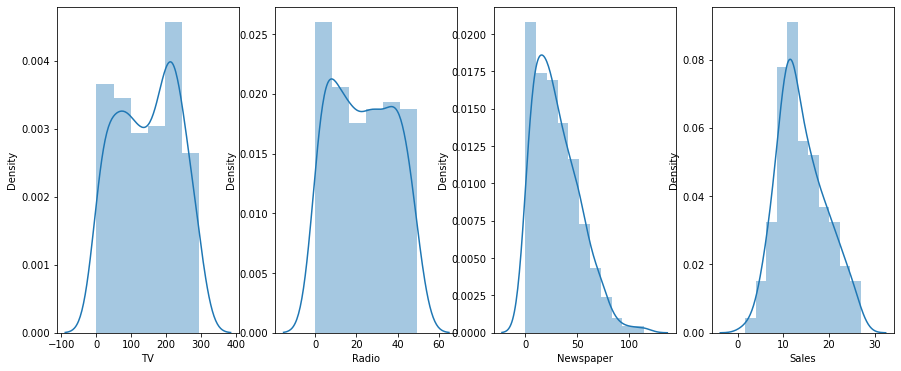

In [9]:
plt.figure(figsize=(15,6))
plt.subplot(141)
sns.distplot(df.TV)
plt.subplot(142)
sns.distplot(df.Radio)
plt.subplot(143)
sns.distplot(df.Newspaper)
plt.subplot(144)
sns.distplot(df.Sales)


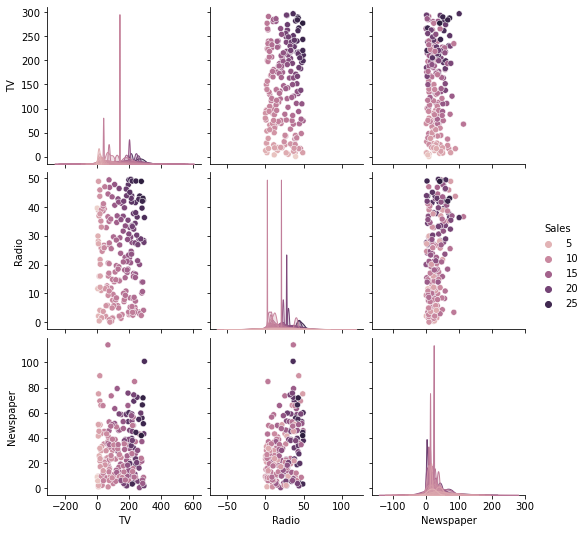

In [12]:
sns.pairplot(df, hue="Sales")

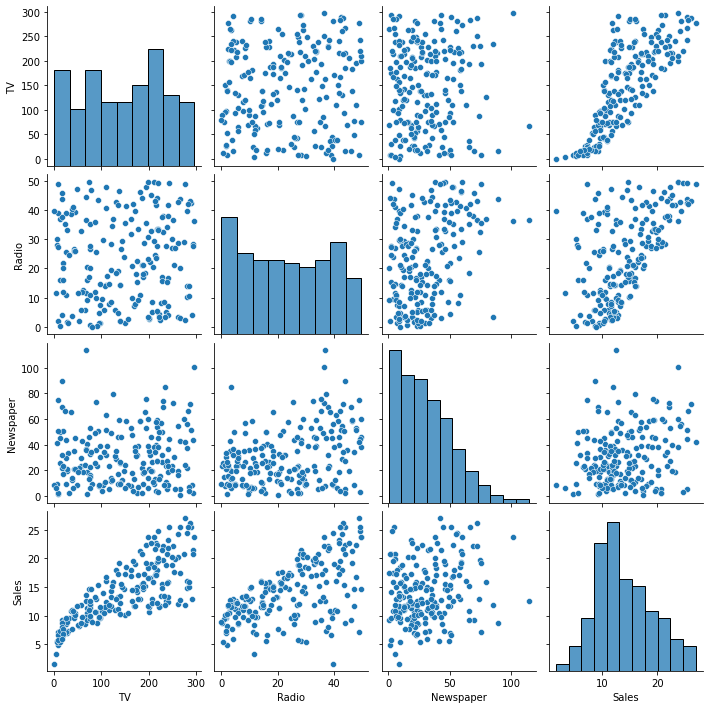

In [64]:
sns.pairplot(df)

<AxesSubplot:xlabel='Radio', ylabel='TV'>

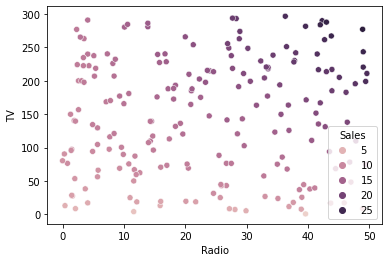

In [13]:
#dark points that are most sales, so if you make investment as advertisement on radio and tv, firms can gain more income.
sns.scatterplot(x=df.Radio, y=df.TV, hue=df.Sales)

<AxesSubplot:xlabel='Radio', ylabel='Newspaper'>

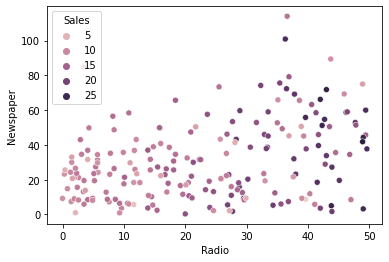

In [14]:
#both newspaper and radio  affects sales 
sns.scatterplot(x=df.Radio, y=df.Newspaper, hue=df.Sales)

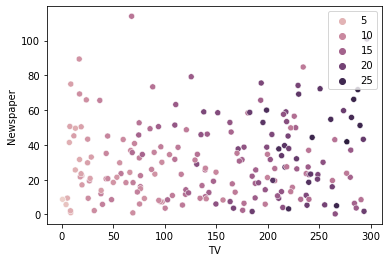

In [17]:
#both newspaper and TV  affects sales 
sns.scatterplot(x=df.TV, y=df.Newspaper, hue=df.Sales)
plt.legend(loc="best")

### Modelling

In [21]:
x=df.drop(["Sales"], axis=1)
y=df[["Sales"]]

In [22]:
from sklearn.model_selection import train_test_split    

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [32]:
L=LinearRegression()
R=Ridge()
Lass=Lasso()
E=ElasticNet()
Ex=ExtraTreeRegressor()
G=GradientBoostingRegressor()
K=KNeighborsRegressor()

In [33]:
#linear regression
model=L.fit(x_train,y_train)
tahmin=model.predict(x_test)

In [40]:
print("r2_score:",r2_score(tahmin,y_test))
print("mean_squared_error:",mean_squared_error(tahmin,y_test)**0.5)
print("mean_absolute_error:",mean_absolute_error(tahmin,y_test))

r2_score: 0.8791069137120033
mean_squared_error: 1.7815996615334502
mean_absolute_error: 1.4607567168117601


In [42]:
#Ridge
model=R.fit(x_train,y_train)
tahmin1=model.predict(x_test)

In [43]:
print("r2_score:",r2_score(tahmin1,y_test))
print("mean_squared_error:",mean_squared_error(tahmin1,y_test)**0.5)
print("mean_absolute_error:",mean_absolute_error(tahmin1,y_test))

r2_score: 0.8791049542584578
mean_squared_error: 1.7815989481622212
mean_absolute_error: 1.4607656112869642


In [45]:
#Lasso
model=Lass.fit(x_train,y_train)
tahmin2=model.predict(x_test)

In [46]:
print("r2_score:",r2_score(tahmin2,y_test))
print("mean_squared_error:",mean_squared_error(tahmin2,y_test)**0.5)
print("mean_absolute_error:",mean_absolute_error(tahmin2,y_test))

r2_score: 0.8777534897716464
mean_squared_error: 1.7730458272046823
mean_absolute_error: 1.4522022785934576


In [47]:
#ElasticNet
model=E.fit(x_train,y_train)
tahmin3=model.predict(x_test)

In [48]:
print("r2_score:",r2_score(tahmin3,y_test))
print("mean_squared_error:",mean_squared_error(tahmin3,y_test)**0.5)
print("mean_absolute_error:",mean_absolute_error(tahmin3,y_test))

r2_score: 0.8783172190860331
mean_squared_error: 1.7769592938861511
mean_absolute_error: 1.456659394269147


In [50]:
# ExtraTreeRegressor
model=Ex.fit(x_train,y_train)
tahmin4=model.predict(x_test)

In [51]:
print("r2_score:",r2_score(tahmin4,y_test))
print("mean_squared_error:",mean_squared_error(tahmin4,y_test)**0.5)
print("mean_absolute_error:",mean_absolute_error(tahmin4,y_test))

r2_score: 0.9395092884909312
mean_squared_error: 1.4909728367747013
mean_absolute_error: 1.1150000000000004


In [52]:
#GradientBoostingRegressor
model=G.fit(x_train,y_train)
tahmin5=model.predict(x_test)

In [53]:
print("r2_score:",r2_score(tahmin5,y_test))
print("mean_squared_error:",mean_squared_error(tahmin5,y_test)**0.5)
print("mean_absolute_error:",mean_absolute_error(tahmin5,y_test))

r2_score: 0.9830645897294621
mean_squared_error: 0.717758877032928
mean_absolute_error: 0.6100450070549888


In [54]:
#KNeighborsRegressor
model=K.fit(x_train,y_train)
tahmin6=model.predict(x_test)

In [55]:
print("r2_score:",r2_score(tahmin6,y_test))
print("mean_squared_error:",mean_squared_error(tahmin6,y_test)**0.5)
print("mean_absolute_error:",mean_absolute_error(tahmin6,y_test))

r2_score: 0.904409378086036
mean_squared_error: 1.679624958137977
mean_absolute_error: 1.189


### Deep Learning

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [58]:
model=Sequential()
model.add(Dense(19,activation="relu")) 
model.add(Dense(19,activation="relu"))
model.add(Dense(19,activation="relu"))
model.add(Dense(19,activation="relu"))
model.add(Dense(19,activation="relu"))
model.add(Dense(1))
model.compile(optimizer="Adam",loss="mse")

In [59]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=500)
model.summary()

Epoch 1/500
2/2 [==============================] - 2s 218ms/step - loss: 161.6556 - val_loss: 106.8869
Epoch 2/500
2/2 [==============================] - 0s 31ms/step - loss: 105.0479 - val_loss: 64.7201
Epoch 3/500
2/2 [==============================] - 0s 29ms/step - loss: 60.8150 - val_loss: 38.1265
Epoch 4/500
2/2 [==============================] - 0s 24ms/step - loss: 32.7921 - val_loss: 25.7962
Epoch 5/500
2/2 [==============================] - 0s 40ms/step - loss: 19.1073 - val_loss: 24.5755
Epoch 6/500
2/2 [==============================] - 0s 30ms/step - loss: 17.1969 - val_loss: 31.2596
Epoch 7/500
2/2 [==============================] - 0s 35ms/step - loss: 23.5744 - val_loss: 37.9399
Epoch 8/500
2/2 [==============================] - 0s 41ms/step - loss: 28.9859 - val_loss: 38.7902
Epoch 9/500
2/2 [==============================] - 0s 31ms/step - loss: 29.3594 - val_loss: 35.0381
Epoch 10/500
2/2 [==============================] - 0s 37ms/step - loss: 25.3431 - val_loss: 29.

2/2 [==============================] - 0s 59ms/step - loss: 6.7009 - val_loss: 12.3122
Epoch 83/500
2/2 [==============================] - 0s 62ms/step - loss: 6.5956 - val_loss: 12.1886
Epoch 84/500
2/2 [==============================] - 0s 63ms/step - loss: 6.5051 - val_loss: 11.9195
Epoch 85/500
2/2 [==============================] - 0s 79ms/step - loss: 6.3172 - val_loss: 11.6107
Epoch 86/500
2/2 [==============================] - 0s 94ms/step - loss: 6.2664 - val_loss: 11.4536
Epoch 87/500
2/2 [==============================] - 0s 62ms/step - loss: 6.3338 - val_loss: 11.3253
Epoch 88/500
2/2 [==============================] - 0s 57ms/step - loss: 6.2813 - val_loss: 11.1616
Epoch 89/500
2/2 [==============================] - 0s 63ms/step - loss: 6.0826 - val_loss: 11.0919
Epoch 90/500
2/2 [==============================] - 0s 65ms/step - loss: 5.9187 - val_loss: 11.1535
Epoch 91/500
2/2 [==============================] - 0s 78ms/step - loss: 5.9427 - val_loss: 11.2396
Epoch 92/500


2/2 [==============================] - 0s 28ms/step - loss: 1.8528 - val_loss: 3.5183
Epoch 165/500
2/2 [==============================] - 0s 27ms/step - loss: 1.8348 - val_loss: 3.3782
Epoch 166/500
2/2 [==============================] - 0s 29ms/step - loss: 1.8123 - val_loss: 3.3019
Epoch 167/500
2/2 [==============================] - 0s 13ms/step - loss: 1.8221 - val_loss: 3.2686
Epoch 168/500
2/2 [==============================] - 0s 29ms/step - loss: 1.8055 - val_loss: 3.2744
Epoch 169/500
2/2 [==============================] - 0s 28ms/step - loss: 1.7808 - val_loss: 3.2641
Epoch 170/500
2/2 [==============================] - 0s 28ms/step - loss: 1.7756 - val_loss: 3.2942
Epoch 171/500
2/2 [==============================] - 0s 28ms/step - loss: 1.7650 - val_loss: 3.3469
Epoch 172/500
2/2 [==============================] - 0s 28ms/step - loss: 1.7833 - val_loss: 3.2264
Epoch 173/500
2/2 [==============================] - 0s 31ms/step - loss: 1.7313 - val_loss: 3.1303
Epoch 174/500


2/2 [==============================] - 0s 69ms/step - loss: 1.2378 - val_loss: 2.7313
Epoch 247/500
2/2 [==============================] - 0s 50ms/step - loss: 1.2721 - val_loss: 2.7358
Epoch 248/500
2/2 [==============================] - 0s 63ms/step - loss: 1.2673 - val_loss: 2.7897
Epoch 249/500
2/2 [==============================] - 0s 47ms/step - loss: 1.2310 - val_loss: 2.7178
Epoch 250/500
2/2 [==============================] - 0s 49ms/step - loss: 1.2219 - val_loss: 2.6528
Epoch 251/500
2/2 [==============================] - 0s 47ms/step - loss: 1.2132 - val_loss: 2.6975
Epoch 252/500
2/2 [==============================] - 0s 47ms/step - loss: 1.2201 - val_loss: 2.6911
Epoch 253/500
2/2 [==============================] - 0s 62ms/step - loss: 1.2055 - val_loss: 2.5707
Epoch 254/500
2/2 [==============================] - 0s 63ms/step - loss: 1.2123 - val_loss: 2.5689
Epoch 255/500
2/2 [==============================] - 0s 76ms/step - loss: 1.2186 - val_loss: 2.6608
Epoch 256/500


2/2 [==============================] - 0s 47ms/step - loss: 0.8920 - val_loss: 2.0200
Epoch 329/500
2/2 [==============================] - 0s 32ms/step - loss: 0.9085 - val_loss: 1.8823
Epoch 330/500
2/2 [==============================] - 0s 47ms/step - loss: 0.8859 - val_loss: 1.8040
Epoch 331/500
2/2 [==============================] - 0s 16ms/step - loss: 0.9238 - val_loss: 1.8776
Epoch 332/500
2/2 [==============================] - 0s 32ms/step - loss: 0.9008 - val_loss: 2.1301
Epoch 333/500
2/2 [==============================] - 0s 16ms/step - loss: 0.9079 - val_loss: 2.1714
Epoch 334/500
2/2 [==============================] - 0s 31ms/step - loss: 0.9169 - val_loss: 1.8918
Epoch 335/500
2/2 [==============================] - 0s 47ms/step - loss: 0.9124 - val_loss: 1.8164
Epoch 336/500
2/2 [==============================] - 0s 63ms/step - loss: 0.9019 - val_loss: 1.9629
Epoch 337/500
2/2 [==============================] - 0s 62ms/step - loss: 0.9693 - val_loss: 1.8052
Epoch 338/500


2/2 [==============================] - 0s 58ms/step - loss: 0.6829 - val_loss: 1.4288
Epoch 411/500
2/2 [==============================] - 0s 71ms/step - loss: 0.6567 - val_loss: 1.3331
Epoch 412/500
2/2 [==============================] - 0s 63ms/step - loss: 0.6550 - val_loss: 1.3624
Epoch 413/500
2/2 [==============================] - 0s 62ms/step - loss: 0.6391 - val_loss: 1.3999
Epoch 414/500
2/2 [==============================] - 0s 47ms/step - loss: 0.6232 - val_loss: 1.3916
Epoch 415/500
2/2 [==============================] - 0s 68ms/step - loss: 0.6374 - val_loss: 1.4114
Epoch 416/500
2/2 [==============================] - 0s 67ms/step - loss: 0.6192 - val_loss: 1.4852
Epoch 417/500
2/2 [==============================] - 0s 84ms/step - loss: 0.6581 - val_loss: 1.3426
Epoch 418/500
2/2 [==============================] - 0s 68ms/step - loss: 0.6512 - val_loss: 1.3247
Epoch 419/500
2/2 [==============================] - 0s 53ms/step - loss: 0.6274 - val_loss: 1.5696
Epoch 420/500


2/2 [==============================] - 0s 38ms/step - loss: 0.4963 - val_loss: 1.2477
Epoch 493/500
2/2 [==============================] - 0s 29ms/step - loss: 0.5008 - val_loss: 1.1961
Epoch 494/500
2/2 [==============================] - 0s 25ms/step - loss: 0.5004 - val_loss: 1.2297
Epoch 495/500
2/2 [==============================] - 0s 31ms/step - loss: 0.4858 - val_loss: 1.2303
Epoch 496/500
2/2 [==============================] - 0s 31ms/step - loss: 0.4899 - val_loss: 1.1520
Epoch 497/500
2/2 [==============================] - 0s 16ms/step - loss: 0.4852 - val_loss: 1.1384
Epoch 498/500
2/2 [==============================] - 0s 16ms/step - loss: 0.4985 - val_loss: 1.1947
Epoch 499/500
2/2 [==============================] - 0s 16ms/step - loss: 0.4835 - val_loss: 1.2940
Epoch 500/500
2/2 [==============================] - 0s 16ms/step - loss: 0.5029 - val_loss: 1.2075
Model: "sequential"
_________________________________________________________________
 Layer (type)               

<AxesSubplot:>

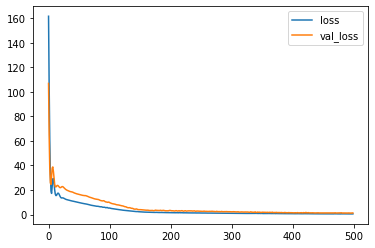

In [60]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot()

In [61]:
tahmin=model.predict(x)

7/7 [==============================] - 0s 1ms/step


In [62]:
r2_score(tahmin,y)

0.9763900218920512

In [63]:
 (mean_squared_error(tahmin,y))**0.5

0.8059231004898693

### Analysis

**A firm  should  not invest  only newspaper advertisement but if the firm invest newspaper advertisements  with Tv and radio advertisements, sales may be high.

**if both tv and radio advertisements are  together invested, the firm' sales most likely can increase.

**The Firm mostly should invest on tv advertisement.